In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn

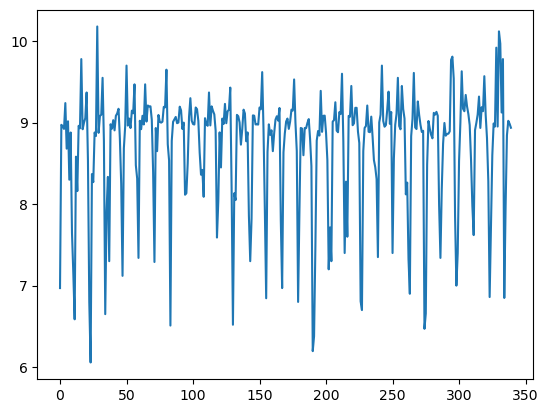

In [21]:
df = pd.read_csv('data/missoula_valley_wells_cleaned.csv')
timeseries = df['151081'].dropna().values.astype('float32')
plt.plot(timeseries)

In [22]:
train_size = int(len(timeseries) * 0.8)
test_size = len(timeseries) - train_size
train, test = timeseries[0:train_size], timeseries[train_size:len(timeseries)]

In [23]:
def create_dataset(dataset, lookback):
    """Transform a time series into a prediction dataset
    
    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback: Size of window for prediction
    """
    X, y = [], []
    for i in range(len(dataset)-lookback):
        feature = dataset[i:i+lookback]
        target = dataset[i+1:i+lookback+1]
        X.append(feature)
        y.append(target)
    return torch.tensor(X), torch.tensor(y)

In [27]:
lookback = 12
X_train, y_train = create_dataset(train, lookback)
X_test, y_test = create_dataset(test, lookback)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([260, 12]) torch.Size([260, 12])
torch.Size([56, 12]) torch.Size([56, 12])


In [30]:
class UniLSTM(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=12, hidden_size=50, num_layers=1, batch_first=True)
        self.linear = nn.Linear(50, 12)
    def forward(self, x):
        x, _ = self.lstm(x)
        # extract only the last time step
        x = x[:, -1, :]
        x = self.linear(x)
        return x